In [134]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import torch
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='/tmp/Cora', name='Cora')

Processing...
Done!


In [135]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
losses=[]
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.val_mask] == data.y[data.val_mask]).sum()
acc = int(correct) / int(data.val_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.7800


### Number of layers

In [136]:
## One layer
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import numpy as np
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        #self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        #x = F.relu(x)
        #x = F.dropout(x, training=self.training)
        #x = self.conv2(x, edge_index)


        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
l2=[0,1e-4,1e-1]
lr=[1e-5,1e-2,9e-1]
i=0

while i<3:
    j=0
    while j<3:
        n=0
        mean_acc=[]
        while n<10:
            optimizer = torch.optim.Adam(model.parameters(), lr=lr[j], weight_decay=l2[i])
            losses=[]
            model.train()
            for epoch in range(200):
                optimizer.zero_grad()
                out = model(data)
                loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
                loss.backward()
                losses.append(loss.item())
                optimizer.step()

            model.eval()
            pred = model(data).argmax(dim=1)
            correct = (pred[data.val_mask] == data.y[data.val_mask]).sum()
            acc = int(correct) / int(data.val_mask.sum())
            mean_acc.append(acc)
            n=n+1
        print('layer: 1',' l2:',l2[i],' learning rate:',lr[j],f' Mean_Accuracy: {np.average(mean_acc):.4f}',f' Std_Accuracy: {np.std(mean_acc, ddof = 1):.4f}')
        j=j+1
    i=i+1
n=n+1

layer: 1  l2: 0  learning rate: 1e-05  Mean_Accuracy: 0.3428  Std_Accuracy: 0.1124
layer: 1  l2: 0  learning rate: 0.01  Mean_Accuracy: 0.6998  Std_Accuracy: 0.0059
layer: 1  l2: 0  learning rate: 0.9  Mean_Accuracy: 0.7178  Std_Accuracy: 0.0006
layer: 1  l2: 0.0001  learning rate: 1e-05  Mean_Accuracy: 0.7180  Std_Accuracy: 0.0000
layer: 1  l2: 0.0001  learning rate: 0.01  Mean_Accuracy: 0.6938  Std_Accuracy: 0.0227
layer: 1  l2: 0.0001  learning rate: 0.9  Mean_Accuracy: 0.7370  Std_Accuracy: 0.0343
layer: 1  l2: 0.1  learning rate: 1e-05  Mean_Accuracy: 0.7460  Std_Accuracy: 0.0000
layer: 1  l2: 0.1  learning rate: 0.01  Mean_Accuracy: 0.7324  Std_Accuracy: 0.0058
layer: 1  l2: 0.1  learning rate: 0.9  Mean_Accuracy: 0.7340  Std_Accuracy: 0.0000


In [137]:
## Two layers
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
l2=[0,1e-4,1e-1]
lr=[1e-5,1e-2,9e-1]
i=0
while i<3:
    j=0
    while j<3:
        n=0
        mean_acc=[]
        while n<10:
            optimizer = torch.optim.Adam(model.parameters(), lr=lr[j], weight_decay=l2[i])
            losses=[]
            model.train()
            for epoch in range(200):
                optimizer.zero_grad()
                out = model(data)
                loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
                loss.backward()
                losses.append(loss.item())
                optimizer.step()

            model.eval()
            pred = model(data).argmax(dim=1)
            correct = (pred[data.val_mask] == data.y[data.val_mask]).sum()
            acc = int(correct) / int(data.val_mask.sum())
            mean_acc.append(acc)
            n=n+1
        print('layer: 2',' l2:',l2[i],' learning rate:',lr[j],f' Mean_Accuracy: {np.average(mean_acc):.4f}',f' Std_Accuracy: {np.std(mean_acc, ddof = 1):.4f}')
        j=j+1
    i=i+1
n=n+1

layer: 2  l2: 0  learning rate: 1e-05  Mean_Accuracy: 0.3930  Std_Accuracy: 0.1479
layer: 2  l2: 0  learning rate: 0.01  Mean_Accuracy: 0.7422  Std_Accuracy: 0.0117
layer: 2  l2: 0  learning rate: 0.9  Mean_Accuracy: 0.5306  Std_Accuracy: 0.0241
layer: 2  l2: 0.0001  learning rate: 1e-05  Mean_Accuracy: 0.5440  Std_Accuracy: 0.0000
layer: 2  l2: 0.0001  learning rate: 0.01  Mean_Accuracy: 0.6216  Std_Accuracy: 0.0510
layer: 2  l2: 0.0001  learning rate: 0.9  Mean_Accuracy: 0.6000  Std_Accuracy: 0.0477
layer: 2  l2: 0.1  learning rate: 1e-05  Mean_Accuracy: 0.6016  Std_Accuracy: 0.0008
layer: 2  l2: 0.1  learning rate: 0.01  Mean_Accuracy: 0.5912  Std_Accuracy: 0.0633
layer: 2  l2: 0.1  learning rate: 0.9  Mean_Accuracy: 0.5172  Std_Accuracy: 0.0483


In [113]:
## Five layers
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16) 
        self.conv2 = GCNConv(16,32) 
        self.conv3 = GCNConv(32,16)
        self.conv4 = GCNConv(16, 8)
        self.conv5 = GCNConv(8, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv3(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv4(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv5(x, edge_index)
        return F.log_softmax(x, dim=1)

        
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
l2=[0,1e-4,1e-1]
lr=[1e-5,1e-2,9e-1]
i=0
while i<3:
    j=0
    while j<3:
        n=0
        mean_acc=[]
        while n<5:
            optimizer = torch.optim.Adam(model.parameters(), lr=lr[j], weight_decay=l2[i])
            losses=[]
            model.train()
            for epoch in range(200):
                optimizer.zero_grad()
                out = model(data)
                loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
                loss.backward()
                losses.append(loss.item())
                optimizer.step()

            model.eval()
            pred = model(data).argmax(dim=1)
            correct = (pred[data.val_mask] == data.y[data.val_mask]).sum()
            acc = int(correct) / int(data.val_mask.sum())
            mean_acc.append(acc)
            n=n+1
        print('layer: 5',' l2:',l2[i],' learning rate:',lr[j],f' Mean_Accuracy: {np.average(mean_acc):.4f}',f' Std_Accuracy: {np.std(mean_acc, ddof = 1):.4f}')
        j=j+1
    i=i+1
n=n+1

layer: 5  l2: 0  learning rate: 1e-05  Mean_Accuracy: 0.1776  Std_Accuracy: 0.0511
layer: 5  l2: 0  learning rate: 0.01  Mean_Accuracy: 0.6840  Std_Accuracy: 0.0214
layer: 5  l2: 0  learning rate: 0.9  Mean_Accuracy: 0.1264  Std_Accuracy: 0.0376
layer: 5  l2: 0.0001  learning rate: 1e-05  Mean_Accuracy: 0.1220  Std_Accuracy: 0.0000
layer: 5  l2: 0.0001  learning rate: 0.01  Mean_Accuracy: 0.2776  Std_Accuracy: 0.2471
layer: 5  l2: 0.0001  learning rate: 0.9  Mean_Accuracy: 0.1576  Std_Accuracy: 0.0886
layer: 5  l2: 0.1  learning rate: 1e-05  Mean_Accuracy: 0.1220  Std_Accuracy: 0.0000
layer: 5  l2: 0.1  learning rate: 0.01  Mean_Accuracy: 0.1588  Std_Accuracy: 0.0945
layer: 5  l2: 0.1  learning rate: 0.9  Mean_Accuracy: 0.0864  Std_Accuracy: 0.0330


## 4. Plotting the training loss

Accuracy: 0.7600


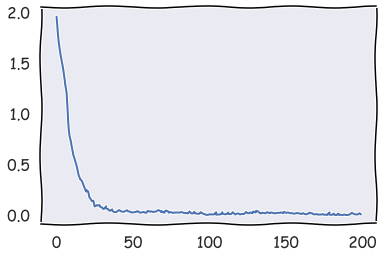

In [114]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-4)
losses=[]
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.val_mask] == data.y[data.val_mask]).sum()
acc = int(correct) / int(data.val_mask.sum())
print(f'Accuracy: {acc:.4f}')

import matplotlib.pyplot as plt
plt.xkcd()
    # This figure will be in XKCD-style
plt.plot(losses)


## 5.Final test evaluation

In [115]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)
        

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=0)
losses=[]
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.7970


##  6. Confusion Matrix

<AxesSubplot:>

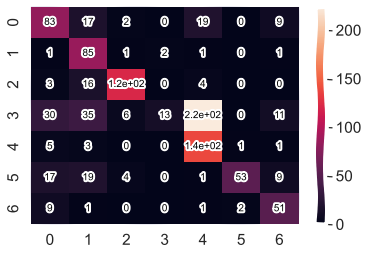

In [138]:
import sklearn.metrics
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt1
arr=sklearn.metrics.confusion_matrix(data.y[data.test_mask], pred[data.test_mask])
df_cm = pd.DataFrame(arr)

sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm,annot=True,annot_kws={'size':10, 'color':'black'}) # font size



## 7. Simplified Graph Convolution

In [139]:
from torch_geometric.nn import SGConv
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = SGConv(dataset.num_features, dataset.num_classes, K=1,
                            cached=True)

    def forward(self):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        return F.log_softmax(x, dim=1)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model, data = Net().to(device), data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2, weight_decay=0.005)


def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
    optimizer.step()


def test():
    model.eval()
    logits, accs = model(), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs


best_val_acc = test_acc = 0
mean_val=[]
for epoch in range(1, 101):
    train()
    train_acc, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    mean_val.append(best_val_acc)    
    print(f'Epoch: {epoch:03d}, Train: {train_acc:.4f}, '
          f'Val: {best_val_acc:.4f}, Test: {test_acc:.4f}')
    
print(f'Mean Val: {np.average(mean_val):.4f}, ')

Epoch: 001, Train: 0.9786, Val: 0.5380, Test: 0.5790
Epoch: 002, Train: 0.9929, Val: 0.7200, Test: 0.7360
Epoch: 003, Train: 0.9929, Val: 0.7320, Test: 0.7590
Epoch: 004, Train: 1.0000, Val: 0.7420, Test: 0.7510
Epoch: 005, Train: 0.9857, Val: 0.7420, Test: 0.7510
Epoch: 006, Train: 0.9857, Val: 0.7420, Test: 0.7510
Epoch: 007, Train: 1.0000, Val: 0.7420, Test: 0.7510
Epoch: 008, Train: 1.0000, Val: 0.7420, Test: 0.7510
Epoch: 009, Train: 1.0000, Val: 0.7420, Test: 0.7510
Epoch: 010, Train: 1.0000, Val: 0.7420, Test: 0.7510
Epoch: 011, Train: 0.9929, Val: 0.7420, Test: 0.7510
Epoch: 012, Train: 1.0000, Val: 0.7420, Test: 0.7510
Epoch: 013, Train: 1.0000, Val: 0.7520, Test: 0.7780
Epoch: 014, Train: 1.0000, Val: 0.7640, Test: 0.7880
Epoch: 015, Train: 1.0000, Val: 0.7640, Test: 0.7880
Epoch: 016, Train: 1.0000, Val: 0.7640, Test: 0.7880
Epoch: 017, Train: 1.0000, Val: 0.7640, Test: 0.7880
Epoch: 018, Train: 1.0000, Val: 0.7640, Test: 0.7880
Epoch: 019, Train: 1.0000, Val: 0.7640, Test: 

In [140]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = SGConv(dataset.num_features, dataset.num_classes, K=2,
                            cached=True)

    def forward(self):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        return F.log_softmax(x, dim=1)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model, data = Net().to(device), data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2, weight_decay=0.005)


def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
    optimizer.step()


def test():
    model.eval()
    logits, accs = model(), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs


best_val_acc = test_acc = 0
mean_val=[]
for epoch in range(1, 101):
    train()
    train_acc, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    mean_val.append(best_val_acc)
    print(f'Epoch: {epoch:03d}, Train: {train_acc:.4f}, '
          f'Val: {best_val_acc:.4f}, Test: {test_acc:.4f}')
print(f'Mean Val: {np.average(mean_val):.4f}, ')

Epoch: 001, Train: 0.9786, Val: 0.7460, Test: 0.7690
Epoch: 002, Train: 0.9857, Val: 0.7480, Test: 0.7900
Epoch: 003, Train: 0.9929, Val: 0.7700, Test: 0.7790
Epoch: 004, Train: 0.9929, Val: 0.7700, Test: 0.7790
Epoch: 005, Train: 1.0000, Val: 0.7700, Test: 0.7790
Epoch: 006, Train: 1.0000, Val: 0.7720, Test: 0.8030
Epoch: 007, Train: 1.0000, Val: 0.7720, Test: 0.8030
Epoch: 008, Train: 0.9929, Val: 0.7720, Test: 0.8030
Epoch: 009, Train: 0.9929, Val: 0.7720, Test: 0.8030
Epoch: 010, Train: 0.9929, Val: 0.7720, Test: 0.8030
Epoch: 011, Train: 0.9929, Val: 0.7720, Test: 0.8030
Epoch: 012, Train: 0.9929, Val: 0.7720, Test: 0.8030
Epoch: 013, Train: 0.9929, Val: 0.7720, Test: 0.8030
Epoch: 014, Train: 1.0000, Val: 0.7860, Test: 0.8150
Epoch: 015, Train: 1.0000, Val: 0.7880, Test: 0.8140
Epoch: 016, Train: 1.0000, Val: 0.7880, Test: 0.8140
Epoch: 017, Train: 1.0000, Val: 0.7880, Test: 0.8140
Epoch: 018, Train: 0.9929, Val: 0.7880, Test: 0.8140
Epoch: 019, Train: 0.9929, Val: 0.7880, Test: 

In [141]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = SGConv(dataset.num_features, dataset.num_classes, K=3,
                            cached=True)

    def forward(self):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        return F.log_softmax(x, dim=1)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model, data = Net().to(device), data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2, weight_decay=0.005)


def train():
    model.train()
    optimizer.zero_grad()
    F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
    optimizer.step()


def test():
    model.eval()
    logits, accs = model(), []
    for _, mask in data('train_mask', 'val_mask', 'test_mask'):
        pred = logits[mask].max(1)[1]
        acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
        accs.append(acc)
    return accs


best_val_acc = test_acc = 0
mean_val=[]
for epoch in range(1, 101):
    train()
    train_acc, val_acc, tmp_test_acc = test()
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        test_acc = tmp_test_acc
    mean_val.append(best_val_acc)
    print(f'Epoch: {epoch:03d}, Train: {train_acc:.4f}, '
          f'Val: {best_val_acc:.4f}, Test: {test_acc:.4f}')
print(f'Mean Val: {np.average(mean_val):.4f}, ')

Epoch: 001, Train: 0.8786, Val: 0.5700, Test: 0.5840
Epoch: 002, Train: 0.9286, Val: 0.7500, Test: 0.7720
Epoch: 003, Train: 0.9429, Val: 0.7720, Test: 0.8030
Epoch: 004, Train: 0.9857, Val: 0.7720, Test: 0.8030
Epoch: 005, Train: 0.9500, Val: 0.7720, Test: 0.8030
Epoch: 006, Train: 0.9643, Val: 0.7720, Test: 0.8030
Epoch: 007, Train: 0.9929, Val: 0.7720, Test: 0.8030
Epoch: 008, Train: 0.9714, Val: 0.7800, Test: 0.8180
Epoch: 009, Train: 0.9714, Val: 0.7860, Test: 0.8100
Epoch: 010, Train: 0.9929, Val: 0.7860, Test: 0.8100
Epoch: 011, Train: 0.9786, Val: 0.7860, Test: 0.8100
Epoch: 012, Train: 0.9857, Val: 0.7860, Test: 0.8100
Epoch: 013, Train: 0.9929, Val: 0.7860, Test: 0.8100
Epoch: 014, Train: 0.9857, Val: 0.7880, Test: 0.8290
Epoch: 015, Train: 0.9857, Val: 0.7880, Test: 0.8290
Epoch: 016, Train: 0.9929, Val: 0.7880, Test: 0.8290
Epoch: 017, Train: 0.9857, Val: 0.7880, Test: 0.8290
Epoch: 018, Train: 0.9786, Val: 0.7880, Test: 0.8290
Epoch: 019, Train: 0.9857, Val: 0.7880, Test: 

## 8. Induced sparsity on the graph

Accuracy: 0.7600


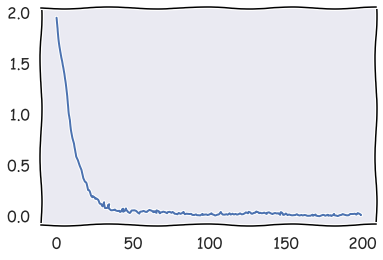

In [117]:
remove_percent = 0.05

e = data.edge_index
m = e.shape[1]
keep = random.sample(range(m), int(m*(1 - remove_percent)))
e_reduced5 = e[:, keep]
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, e_reduced5

        x = self.conv1(x, e_reduced5)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, e_reduced5)

        return F.log_softmax(x, dim=1)
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-4)
losses=[]
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.val_mask] == data.y[data.val_mask]).sum()
acc = int(correct) / int(data.val_mask.sum())
print(f'Accuracy: {acc:.4f}')

import matplotlib.pyplot as plt
plt.xkcd()
    # This figure will be in XKCD-style
plt.plot(losses)




Accuracy: 0.7580


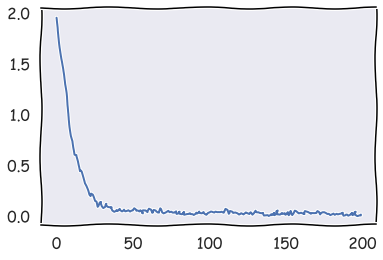

In [118]:
remove_percent = 0.25

e = data.edge_index
m = e.shape[1]
keep = random.sample(range(m), int(m*(1 - remove_percent)))
e_reduced25 = e[:, keep]
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, e_reduced25

        x = self.conv1(x, e_reduced25)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, e_reduced25)

        return F.log_softmax(x, dim=1)
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-4)
losses=[]
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.val_mask] == data.y[data.val_mask]).sum()
acc = int(correct) / int(data.val_mask.sum())
print(f'Accuracy: {acc:.4f}')

import matplotlib.pyplot as plt
plt.xkcd()
    # This figure will be in XKCD-style
plt.plot(losses)

Accuracy: 0.6700


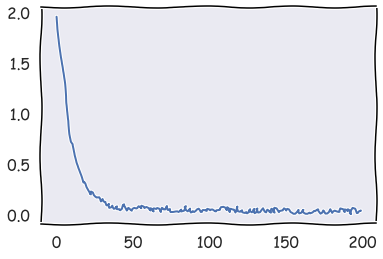

In [119]:
remove_percent = 0.5

e = data.edge_index
m = e.shape[1]
keep = random.sample(range(m), int(m*(1 - remove_percent)))
e_reduced50 = e[:, keep]
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, e_reduced50

        x = self.conv1(x, e_reduced50)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, e_reduced50)

        return F.log_softmax(x, dim=1)
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-4)
losses=[]
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.val_mask] == data.y[data.val_mask]).sum()
acc = int(correct) / int(data.val_mask.sum())
print(f'Accuracy: {acc:.4f}')

import matplotlib.pyplot as plt
plt.xkcd()
    # This figure will be in XKCD-style
plt.plot(losses)

Accuracy: 0.5240


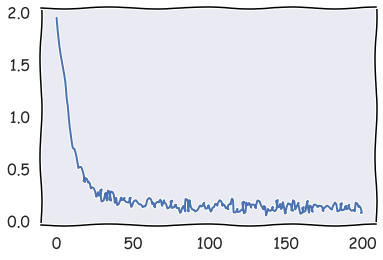

In [120]:
remove_percent = 0.95

e = data.edge_index
m = e.shape[1]
keep = random.sample(range(m), int(m*(1 - remove_percent)))
e_reduced95 = e[:, keep]
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, e_reduced95

        x = self.conv1(x, e_reduced95)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, e_reduced95)

        return F.log_softmax(x, dim=1)
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2, weight_decay=1e-4)
losses=[]
model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.val_mask] == data.y[data.val_mask]).sum()
acc = int(correct) / int(data.val_mask.sum())
print(f'Accuracy: {acc:.4f}')

import matplotlib.pyplot as plt
plt.xkcd()
    # This figure will be in XKCD-style
plt.plot(losses)